In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV파일 로드

In [27]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


## 결측치 확인

In [28]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### 컬럼 설명

1. **Sex**: 전복의 성별 (M: 수컷, F: 암컷, I: 새끼)
2. **Length**: 전복의 최대 길이 (밀리미터 단위)
3. **Diameter**: 전복의 지름, 길이에 수직인 측정치 (밀리미터 단위)
4. **Height**: 전복의 높이, 껍질 속 고기 포함 (밀리미터 단위)
5. **Whole weight**: 전복 전체의 무게 (그램 단위)
6. **Shucked weight**: 전복 고기의 무게 (그램 단위)
7. **Viscera weight**: 전복의 내장 무게, 출혈 후 측정 (그램 단위)
8. **Shell weight**: 건조 후 전복 껍질의 무게 (그램 단위)
9. **Rings**: 전복의 고리 수, 나이 추정의 기준 (+1.5년)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


In [30]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

### 인코딩 (문자->수치)

In [31]:
# 'Sex'컬럼의 F/M을 수치화
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])

(M->0, F->2, I->1)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_3352/2749004283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rings', data=df, palette='Set3')


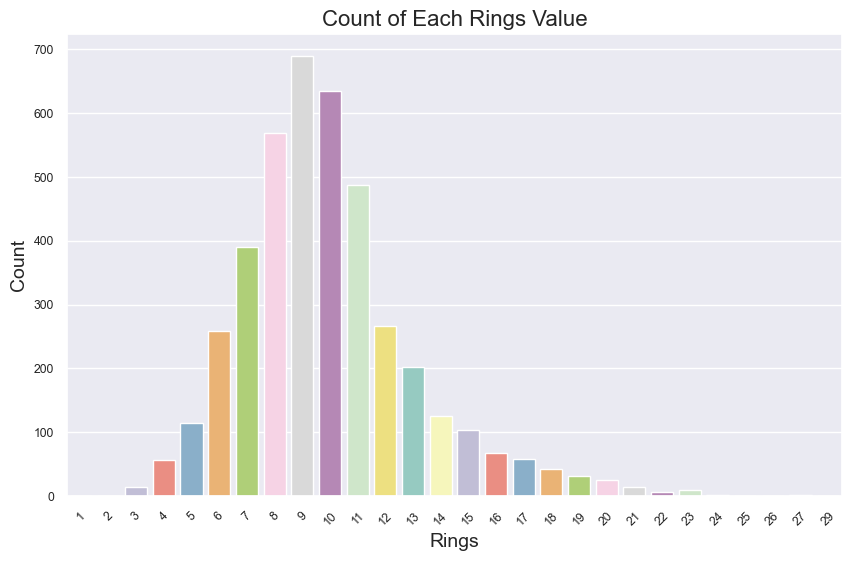

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=df, palette='Set3')
plt.title('Count of Each Rings Value', fontsize=16)
plt.xlabel('Rings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 값이 겹치지 않도록 회전
plt.show()

## 각 피쳐간의 상관관계를 확인.

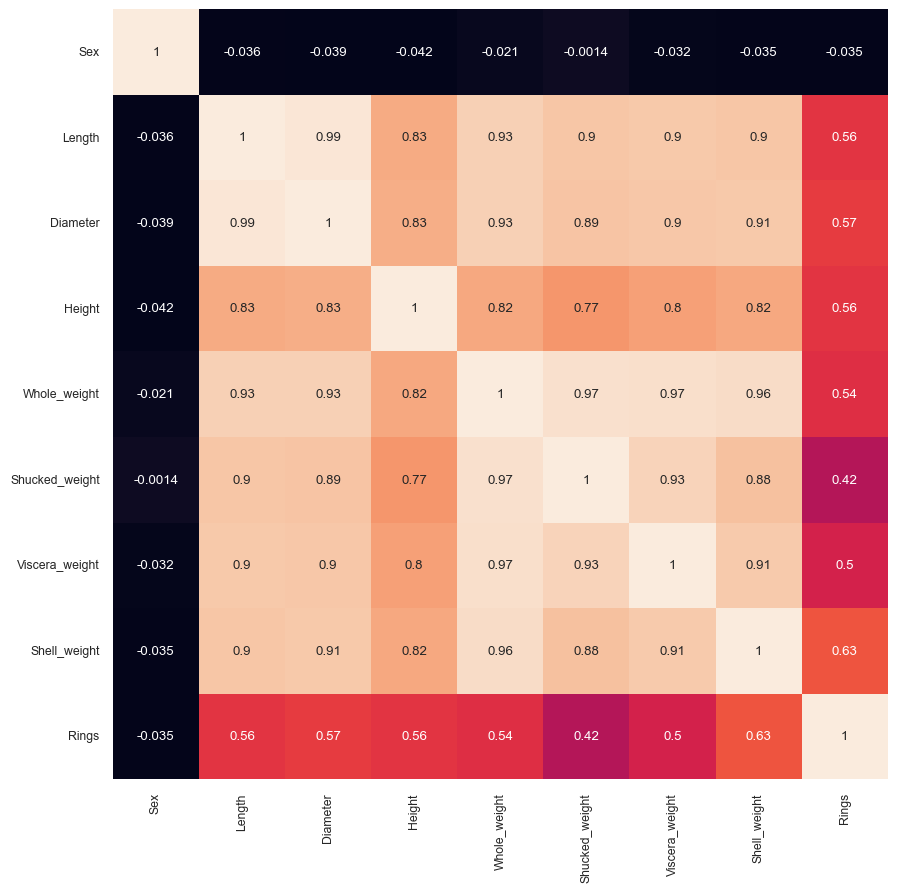

In [33]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [34]:
y = df["Rings"]
y 

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [35]:
x = df.drop("Rings" , axis = 1)
x

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3132, 8), (1045, 8), (3132,), (1045,))

In [37]:
#전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)


In [38]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.2631578947368421
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  8 20  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 21 28  5  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 15 47 26 21  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4 18 52 53 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11 22 73 43  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 13 51 47 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 11 35 45 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7 30 39 14  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  9 24 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 12 15  3  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5 14  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  

In [40]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.2545454545454545
[[ 0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5 10 20  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  3 18 29  8  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15 40 45 12  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 16 62 45 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  9 32 66 39  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  9 18 44 44 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 12 31 47 21  0  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 10 26 28 21  0  3  0  1  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  4 23 15  0  0  0  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7 15  4  0  3  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 11  6  0  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0 

/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(train_scaled, y_train)

pred_dt = clf_dt.predict(test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.18277511961722487
[[ 1  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  4  5  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 10  7 11  7  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  2  7 12 22 11  2  2  1  2  1  0  0  0  0  0  0  0  0  0  1  0  0  0
   0]
 [ 0  0  4 15 36 33 15  3  4  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  9 26 30 37 15 12  1  4  1  2  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  4 11 28 40 31 13  7  7  1  4  4  2  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  8 13 34 25 19 15 11  3  4  4  1  0  1  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  3 11 21 35 16  9 11  3  1  1  5  4  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  2  9 19 20 11  9  9  3  3  0  0  1  2  1  0  2  2  0  0  0
   0]
 [ 0  0  0  0  0  5  4 10  9  6  6  2  1  2  1  1  2  1  0  0  1  0  0  0
   0]
 [ 0  0  0  0  0  2  3  2  6  5  5  2  1  3  0  0  0  3  0  0  0  

In [42]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.23157894736842105
[[ 0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10 13 11  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  8 19 22 10  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 28 31 35 10  5  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  7 18 51 36 19  3  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 32 41 44 14  4  3  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  5 12 33 44 27  7  4  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  8 35 39 25  2  6  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  5 20 34 13  6  5  1  1  1  0  1  1  0  0  0  1  0  1  0]
 [ 0  0  0  0  1  3  7 13 14  6  3  2  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  6 11  6  1  0  2  2  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  6  5  2  2  1  0  0  1  0  0  0  

In [43]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, y_train)
pred = kn.predict(test_scaled)
print ("\n--- KNeighbors ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- KNeighbors ---
0.20478468899521532
[[ 0  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9 14  8  6  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  7 19 23  8  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 39 23 31 10  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9 32 45 34 13  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 14 39 45 36  8  2  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 11 16 39 34 20  8  4  1  1  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  7 17 34 32 20  2  4  0  0  0  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  3 12 24 26 15  7  3  0  0  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  5  4 10  9 13  3  3  0  2  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  7  9  6  1  1  0  0  2  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  4  4  5  4  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  2  

## ['Rings']라벨 그룹화

-'Rings'라벨의의 원소가 너무 다양하기 떄문에 특정 구간으로 그룹화를 진행함.

In [44]:
print (df.columns)
df = df.drop(columns=['Sex']) # Sex 특성 제거

for ix in df.index :
    row = df.loc[ix]
    if row.Rings <= 8:
        df.loc[ix, 'Rings'] = 'young'
    elif row.Rings >= 11:
        df.loc[ix, 'Rings'] = 'old'
    elif row.Rings >=9 & row.Rings <= 10:
        df.loc[ix, 'Rings'] = 'medium'
        
df.head()

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_3352/3874682361.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'old' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[ix, 'Rings'] = 'old'


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,medium
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,medium
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,young


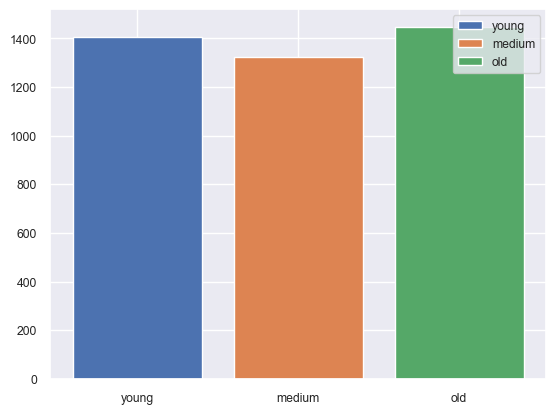

In [45]:
plt.bar("young", len(df[df['Rings'] == 'young']), label="young")
plt.bar("medium", len(df[df['Rings'] == 'medium']), label="medium")
plt.bar("old", len(df[df['Rings'] == 'old']), label="old")
plt.legend()
plt.show()

In [46]:
y = df["Rings"]
y 

id
0          old
1        young
2       medium
3       medium
4        young
         ...  
4172       old
4173    medium
4174    medium
4175    medium
4176       old
Name: Rings, Length: 4177, dtype: object

In [47]:
x = df.drop("Rings" , axis = 1)
x

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3132, 7), (1045, 7), (3132,), (1045,))

In [49]:
#전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

In [50]:
# SVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# SVM 모델 학습
clf_svm = SVC(random_state=0)
clf_svm.fit(train_scaled, y_train)

# 테스트 데이터에 대해 예측
pred_svm = clf_svm.predict(test_scaled)

print("\n--- SVM Classifier ---")
# 정확도 출력
print("Accuracy:", accuracy_score(y_test, pred_svm))

# 혼동 행렬 출력
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_svm))

# 혼동 행렬 및 분류 보고서 출력
cm = confusion_matrix(y_test, pred_svm)
print("Classification Report:\n", classification_report(y_test, pred_svm))


--- SVM Classifier ---
Accuracy: 0.6602870813397129
Confusion Matrix:
 [[151  78  62]
 [111 234  33]
 [ 61  10 305]]
Classification Report:
               precision    recall  f1-score   support

      medium       0.47      0.52      0.49       291
         old       0.73      0.62      0.67       378
       young       0.76      0.81      0.79       376

    accuracy                           0.66      1045
   macro avg       0.65      0.65      0.65      1045
weighted avg       0.67      0.66      0.66      1045



In [51]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(train_scaled, y_train)

pred_lr = clf_lr.predict(test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))
cm = confusion_matrix(pred_lr, y_test)

print("report :\n", classification_report(pred_lr, y_test))


--- Logistic Regression Classifier ---
0.661244019138756
[[154  67  70]
 [113 229  36]
 [ 59   9 308]]
report :
               precision    recall  f1-score   support

      medium       0.53      0.47      0.50       326
         old       0.61      0.75      0.67       305
       young       0.82      0.74      0.78       414

    accuracy                           0.66      1045
   macro avg       0.65      0.66      0.65      1045
weighted avg       0.67      0.66      0.66      1045



In [52]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(train_scaled, y_train)

pred_dt = clf_dt.predict(test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))
cm = confusion_matrix(pred_dt, y_test)

print("report :\n", classification_report(pred_dt, y_test))


--- Decision Tree Classifier ---
0.5942583732057416
[[123 101  67]
 [120 224  34]
 [ 69  33 274]]
report :
               precision    recall  f1-score   support

      medium       0.42      0.39      0.41       312
         old       0.59      0.63      0.61       358
       young       0.73      0.73      0.73       375

    accuracy                           0.59      1045
   macro avg       0.58      0.58      0.58      1045
weighted avg       0.59      0.59      0.59      1045



In [53]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_scaled, y_train)
pred = rf_clf.predict(test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))
cm = confusion_matrix(pred, y_test)

print("report :\n", classification_report(pred, y_test))


--- Random Forest ---
0.6545454545454545
[[143  88  60]
 [117 236  25]
 [ 53  18 305]]
report :
               precision    recall  f1-score   support

      medium       0.49      0.46      0.47       313
         old       0.62      0.69      0.66       342
       young       0.81      0.78      0.80       390

    accuracy                           0.65      1045
   macro avg       0.64      0.64      0.64      1045
weighted avg       0.65      0.65      0.65      1045



In [54]:
#KNeighbors
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled, y_train)
pred_knn = kn.predict(test_scaled)
print ("\n--- KNeighbors ---")
print(accuracy_score(y_test,pred_knn))
print (confusion_matrix(y_test, pred_knn))

cm = confusion_matrix(pred_knn, y_test)

print("report :\n", classification_report(pred_knn, y_test))


--- KNeighbors ---
0.6162679425837321
[[152  87  52]
 [143 209  26]
 [ 75  18 283]]
report :
               precision    recall  f1-score   support

      medium       0.52      0.41      0.46       370
         old       0.55      0.67      0.60       314
       young       0.75      0.78      0.77       361

    accuracy                           0.62      1045
   macro avg       0.61      0.62      0.61      1045
weighted avg       0.61      0.62      0.61      1045

